In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
data = pd.read_csv('conversion_data.csv')

# EDA

- **Germany had the highest conversion rate with the smallest amount of users.**
- **China had the lowest conversion rate, but held the second most of users.**

In [3]:
a = data.groupby('country', as_index=False).agg({"converted": [sum, 'count']})
a['ratio'] = a[('converted',   'sum')]/a[('converted', 'count')]
a

country converted             ratio
                 sum   count          
0    China       102   76602  0.001332
1  Germany       816   13056  0.062500
2       UK      2550   48450  0.052632
3       US      6732  178092  0.037801

- **Ads was the most effective source of all kind, with a conversion rate 22% higher than direct sourcing and 5% better than seo.**

In [4]:
b = data.groupby('source', as_index=False).agg({"converted": [sum, 'count']})
b['ratio'] = b[('converted', 'sum')]/b[('converted','count')]
b

source converted             ratio
                sum   count          
0     Ads      3060   88740  0.034483
1  Direct      2040   72420  0.028169
2     Seo      5100  155040  0.032895

- **Previously, ads was the most effective source overall, however, when it came to new users, the differences were not as big as before.**

In [5]:
c = data.groupby(['source', 'new_user'], as_index=False).agg({"converted": [sum, 'count']})
c['ratio'] = c[('converted', 'sum')]/c[('converted','count')]
c

source new_user converted             ratio
                         sum   count          
0     Ads        0      2185   27891  0.078341
1     Ads        1       875   60849  0.014380
2  Direct        0      1387   22678  0.061161
3  Direct        1       653   49742  0.013128
4     Seo        0      3589   48887  0.073414
5     Seo        1      1511  106153  0.014234

- **While direct sourcing had been shown the least effective approach in the previous analysis, for Chinese new users, it was significantly better the others.**

In [6]:
d = data.groupby(['country', 'new_user', 'source'], as_index=False).agg({"converted": [sum, 'count']})
d['ratio'] = d[('converted', 'sum')]/d[('converted','count')]
d
# d.sort_values('ratio', ascending=False)

country new_user  source converted            ratio
                                   sum  count          
0     China        0     Ads        22   6541  0.003363
1     China        0  Direct        14   5262  0.002661
2     China        0     Seo        30  11291  0.002657
3     China        1     Ads        10  15020  0.000666
4     China        1  Direct        10  12201  0.000820
5     China        1     Seo        16  26287  0.000609
6   Germany        0     Ads       189   1224  0.154412
7   Germany        0  Direct       105    902  0.116408
8   Germany        0     Seo       295   2088  0.141284
9   Germany        1     Ads        62   2536  0.024448
10  Germany        1  Direct        48   1962  0.024465
11  Germany        1     Seo       117   4344  0.026934
12       UK        0     Ads       539   4301  0.125320
13       UK        0  Direct       331   3500  0.094571
14       UK        0     Seo       904   7711  0.117235
15       UK        1     Ads       213   9217  0.023109
16       UK        1  Direct       184   7631  0.024112
17       UK        1     Seo       379  16090  0.023555
18       US        0     Ads      1435  15825  0.090679
19       US        0  Direct       937  13014  0.071999
20       US        0     Seo      2360  27797  0.084901
21       US        1     Ads       590  34076  0.017314
22       US        1  Direct       411  27948  0.014706
23       US        1     Seo       999  59432  0.016809

- **Regardless of new user or not, the conversion rate is positively correlated with the total visited pages, this is especially true for returning users.**

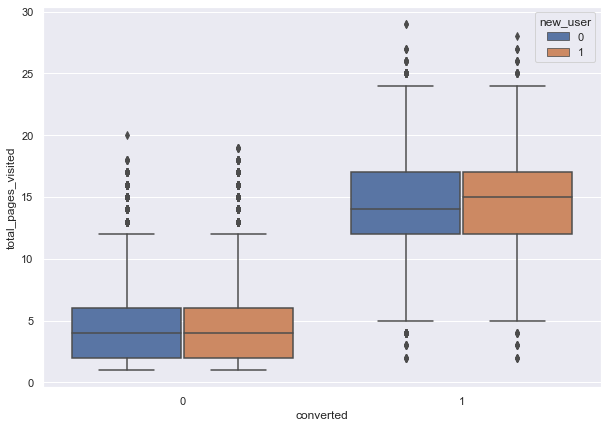

In [7]:
sns.set(rc={'figure.figsize':(10, 7)})
sns.boxplot(data=data, y='total_pages_visited', x='converted', hue='new_user')

- **Younger users were more likely to convert.**

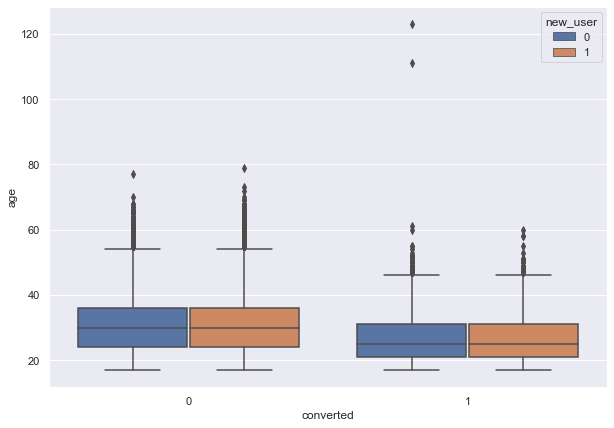

In [20]:
sns.set(rc={'figure.figsize':(10, 7)})
sns.boxplot(data=data, y='age', x='converted', hue='new_user')

- **In the previous section, we found that converted users visited more pages and younger people were more likely to convert, the scatter plot below reveals that younger people were more likely to click on more pages, therefore, we probably should focus on targeting young users.**

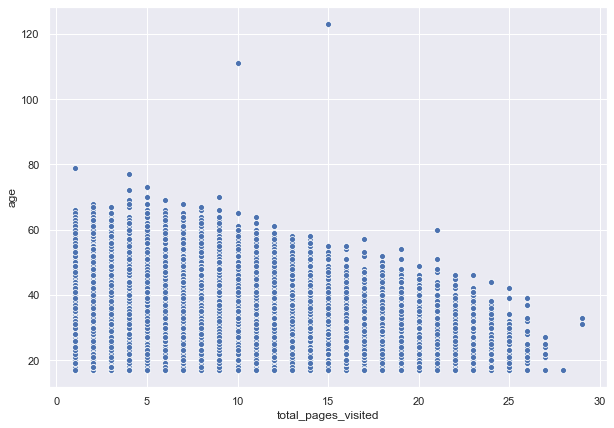

In [26]:
sns.scatterplot(data=data, y='age', x='total_pages_visited')

# Prediction

In [22]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score, precision_score, f1_score

In [25]:
data_model = data.copy()

In [26]:
le = LabelEncoder()
data_model['country'] = le.fit_transform(data_model['country'])
data_model['source'] = le.fit_transform(data_model['source'])

In [27]:
scaler = MinMaxScaler()
data_model['age'] = scaler.fit_transform(data_model[['age']])
data_model['total_pages_visited'] = scaler.fit_transform(data_model[['total_pages_visited']])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_model[['country','age','new_user','total_pages_visited','source']],
                                                   data_model['converted'], test_size=0.2, stratify=data_model['converted'])

## Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [31]:
pred_lr = clf_lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_lr)
auc(fpr, tpr)

0.8333415032679737

## Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [33]:
clf_dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [34]:
pred_dt = clf_dt.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_dt)
auc(fpr, tpr)

0.8283496732026143

## Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clf_rf = RandomForestClassifier(max_depth=20,random_state=42).fit(X_train, y_train)

In [37]:
clf_rf.score(X_test, y_test)

0.9848829854522454

In [38]:
pred_rf = clf_rf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_rf)
auc(fpr, tpr)

0.8396078431372548

## XgBoost

In [39]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import xgboost  as xgb

In [40]:
clf_xgb = XGBClassifier(objective='binary:logistic')

In [44]:
clf_xgb.fit(X_train, y_train, eval_metric="auc", eval_set=[(X_test, y_test)], verbose=False)

C:\Users\EDZ\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [42]:
pred_xgb = clf_xgb.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb)
auc(fpr, tpr)

C:\Users\EDZ\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.8441013071895425

In [32]:
accuracy_score(y_test, pred_xgb)

0.98617963314358

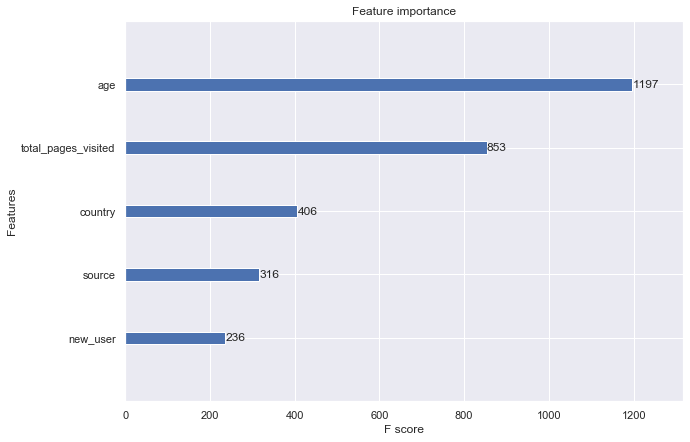

In [43]:
from xgboost import plot_importance
plot_importance(clf_xgb)

# Conclusion:
- **Marketing resources tilt towards Germany might be a good idea as it had the highest conversion rate.**
- **Something might be off in China as it had the lowest conversion rate, but held the second most of users, investigation is worthy to look for growing opportunities** 
- **If allowed, ads should be promoting because it was the most effective source of all kind but less effective for new users, ads that target old users probably has the highest return.**
- **Direct sourcing worked surprisingly well for Chinese new users, it might be abnormal because the whole cohort was acting differently, again investigation is highly recommended.**
- **When predicting the conversion rate, age was the most important feature, marketing target around younger users would make the most sense.**